In [92]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC  
from sklearn import naive_bayes  

In [93]:
data = pd.read_csv('./data/Custom_CNN_Features.csv')  

In [94]:
print(data.describe())  

       Class Label           f0           f1           f2           f3  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.849062    17.516938    57.919104   112.822180   170.829473   
std       0.689245    54.948034    93.672074    96.561850   124.512873   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000    46.988506    85.638191   
50%       1.000000     0.000000     0.000000    93.278381   160.636246   
75%       1.000000     0.000000   117.704697   159.855179   248.145508   
max       2.000000   781.789490   459.207794   536.879639   760.753845   

                f4           f5           f6      f7            f8  ...  \
count  3253.000000  3253.000000  3253.000000  3253.0   3253.000000  ...   
mean     17.606476   141.614480    11.035532     0.0    214.312125  ...   
std      35.626627    99.128478    20.554964     0.0    738.811309  ...   
min       0.000000     0.000000  

In [95]:
print(data.isna().sum())  


Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64


In [96]:
# from sklearn.preprocessing import LabelEncoder
#
# # Initialize the label encoder
# label_encoder = LabelEncoder()
#
# # Fit and transform the 'Class Label' column
# data['Filename'] = label_encoder.fit_transform(data['Filename'])
#
# # Verify the transformation
# print(data['Filename'].head())
# data = data.fillna(data.median())

In [97]:
print(data['Class Label'].value_counts())  

Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


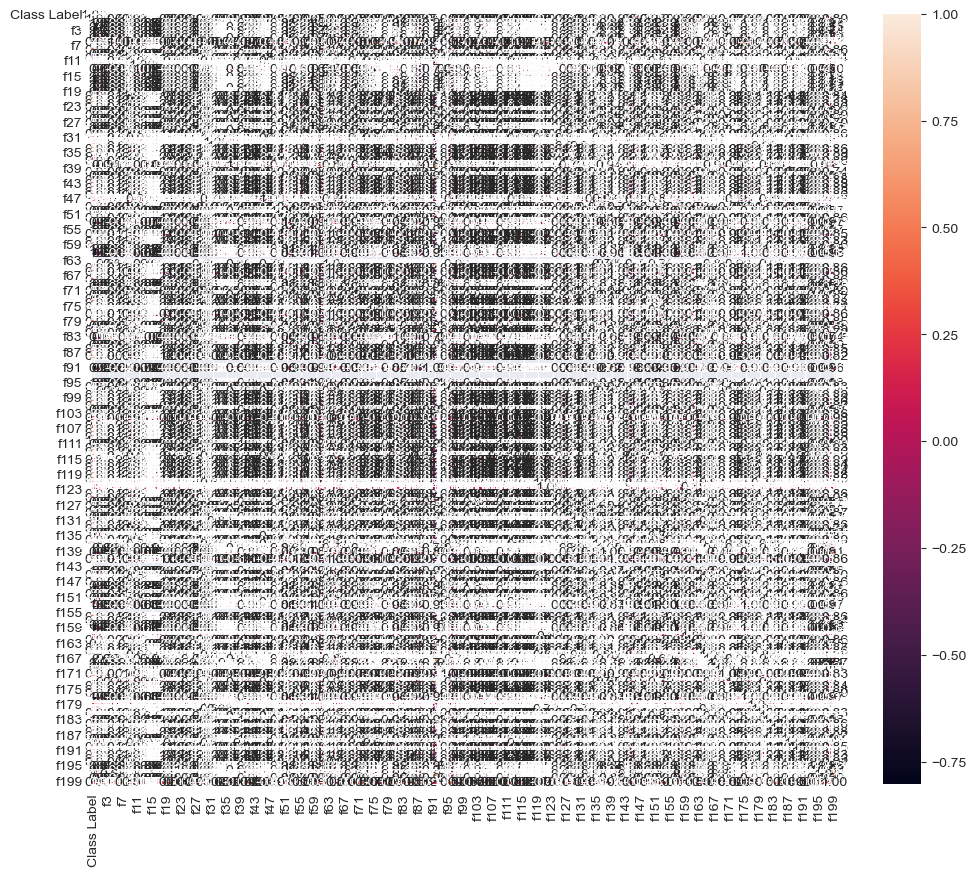

In [98]:
# Find correlation matrix and plot it

corr = data[data.columns[1:]].corr()  
plt.figure(figsize=(12, 10))  
sns.heatmap(corr, annot=True, fmt=".2f")  
plt.show()  

In [99]:
# Matrix rank study to find the dimensionality of data cloud
rank = np.linalg.matrix_rank(data[data.columns[1:]])  
print(rank)  

175


In [100]:
# Data range and normalization aspects
print(data.describe())  

       Class Label           f0           f1           f2           f3  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.849062    17.516938    57.919104   112.822180   170.829473   
std       0.689245    54.948034    93.672074    96.561850   124.512873   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000    46.988506    85.638191   
50%       1.000000     0.000000     0.000000    93.278381   160.636246   
75%       1.000000     0.000000   117.704697   159.855179   248.145508   
max       2.000000   781.789490   459.207794   536.879639   760.753845   

                f4           f5           f6      f7            f8  ...  \
count  3253.000000  3253.000000  3253.000000  3253.0   3253.000000  ...   
mean     17.606476   141.614480    11.035532     0.0    214.312125  ...   
std      35.626627    99.128478    20.554964     0.0    738.811309  ...   
min       0.000000     0.000000  

In [101]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler  

scaler = MinMaxScaler()  
data[data.columns[1:]] = scaler.fit_transform(data[data.columns[1:]])  

print(data.describe())  

       Class Label           f0           f1           f2           f3  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean      0.424531     0.022406     0.126128     0.210144     0.224553   
std       0.344622     0.070285     0.203986     0.179858     0.163670   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.087521     0.112570   
50%       0.500000     0.000000     0.000000     0.173742     0.211154   
75%       0.500000     0.000000     0.256321     0.297749     0.326184   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                f4           f5           f6      f7           f8  ...  \
count  3253.000000  3253.000000  3253.000000  3253.0  3253.000000  ...   
mean      0.086903     0.241132     0.050626     0.0     0.021158  ...   
std       0.175848     0.168790     0.094297     0.0     0.072939  ...   
min       0.000000     0.000000     0

In [109]:

from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  
from sklearn.naive_bayes import GaussianNB  

data['Class Label'] = data['Class Label'].astype(int)  
X = data.drop(columns=['Filename', 'Class Label'])  
y = data['Class Label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  

classifiers = {  
    "kNN": KNeighborsClassifier(),  
    "Decision Tree": DecisionTreeClassifier(),  
    "SVM": SVC(probability=True),  
    "Random Forest": RandomForestClassifier(),  
    "Naive Bayes": GaussianNB()  
}  

results = {}  
for name, clf in classifiers.items():  
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None  

    results[name] = {  
        "Accuracy": accuracy_score(y_test, y_pred),  
        "Precision": precision_score(y_test, y_pred, average="weighted"),  
        "Recall": recall_score(y_test, y_pred, average="weighted"),  
        "F1-Score": f1_score(y_test, y_pred, average="weighted"),  
        "AUROC": roc_auc_score(y_test, y_prob, multi_class="ovr") if y_prob is not None else "N/A"  
    }  

results = pd.DataFrame(results).T  
print(results)  

               Accuracy  Precision    Recall  F1-Score     AUROC
kNN            0.984029   0.984053  0.984029  0.983836  0.981898
Decision Tree  0.972973   0.973321  0.972973  0.973110  0.960211
SVM            0.982801   0.983156  0.982801  0.982470  0.991556
Random Forest  0.984029   0.984053  0.984029  0.983836  0.993795
Naive Bayes    0.955774   0.959020  0.955774  0.956722  0.976205


In [112]:
from time import time  

fit_results = {}  

for name, clf in classifiers.items():  
    start_train = time()  
    clf.fit(X_train, y_train)  
    end_train = time()  

    start_test = time()  
    y_train_pred = clf.predict(X_train)  
    y_test_pred = clf.predict(X_test)  
    end_test = time()  

    train_accuracy = accuracy_score(y_train, y_train_pred)  
    test_accuracy = accuracy_score(y_test, y_test_pred)  

    fit_results[name] = {  
        "Training Time (s)": end_train - start_train,  
        "Prediction Time (s)": end_test - start_test,  
        "Train Accuracy": train_accuracy,  
        "Test Accuracy": test_accuracy,  
        "Fit Status": "Underfit" if train_accuracy < test_accuracy else  
                      "Overfit" if train_accuracy > test_accuracy else  
                      "Regular Fit"  
    }  

fit_results = pd.DataFrame(fit_results).T  
print(fit_results)  

              Training Time (s) Prediction Time (s) Train Accuracy  \
kNN                    0.006913            0.114308         0.9795   
Decision Tree          0.109769            0.008506            1.0   
SVM                    0.147024            0.058325        0.97458   
Random Forest          0.513268            0.019806            1.0   
Naive Bayes            0.008518            0.015121        0.95203   

              Test Accuracy Fit Status  
kNN                0.984029   Underfit  
Decision Tree       0.97543    Overfit  
SVM                0.982801   Underfit  
Random Forest      0.984029    Overfit  
Naive Bayes        0.955774   Underfit  
